In [2]:
import nibabel as nib
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
# Function to load a NIfTI file
def load_nifti_file(file_path):
    # Load the NIfTI file
    nifti_img = nib.load(file_path)
    return nifti_img

path = "C://Work/nmrlab10/MRSI_fit/"
# Replace 'path_to_nifti_file_1' and 'path_to_nifti_file_2' with your actual file paths
nifti_file_1_path = 'experiments/ISMRM_2/1/Nifty_versions/HC08_M01_ratios_nii/Glu_RatToCr+PCr_map_new.nii'
nifti_file_2_path = 'experiments/exp49/1/test/HC08_M01/Glu.nii.gz'

# Load the NIfTI files
nifti_img_1 = load_nifti_file(path+nifti_file_1_path)
nifti_img_2 = load_nifti_file(path+nifti_file_2_path)

nifti_data_1 = np.nan_to_num(nifti_img_1.get_fdata())
nifti_data_2 = np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()),axis=(0,1))

nifti_data_1 = nifti_data_1
nifti_data_2 = nifti_data_2
# Now you can use nifti_img_1 and nifti_img_2 variables to access the data
print(f"NIfTI file 1 shape: {nifti_data_1.shape}")
print(f"NIfTI file 2 shape: {nifti_data_2.shape}")

nifti_data_1[nifti_data_1>2]=0


FileNotFoundError: No such file or no access: 'C://Work/nmrlab10/MRSI_fit/experiments/exp49/1/test/HC08_M01/Glu.nii.gz'

In [3]:




slice_index=16
# Get the middle slices for both NIfTI files
slice_1 = nifti_data_1[:, :, slice_index]#/nifti_data_1[:, :, slice_index].max()
slice_2 = nifti_data_2[:, :, slice_index]#/nifti_data_2[:, :, slice_index].max()


mask = ~((slice_1 == 0) | (slice_2 == 0)) 
mask.shape
# slice_1 = nifti_data_1[:, 2*slice_index]
# slice_2 = nifti_data_2[:,  2*slice_index]
# 
# slice_1 = nifti_data_1[2*slice_index]
# slice_2 = nifti_data_2[2*slice_index]


# Now let's plot both slices using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Plot the first slice
im_1 = axes[0].imshow((slice_1*mask).T, cmap="gray", origin="lower")
axes[0].set_title('Slice from NIfTI file 1')
cbar = fig.colorbar(im_1, ax=axes[0], orientation='horizontal')
axes[0].set_xticks([])  # Turn off x-axis ticks
axes[0].set_yticks([])  # Turn off y-axis ticks
# Plot the second slice
im_2 = axes[1].imshow((slice_2*mask).T, cmap="gray", origin="lower")
axes[1].set_title('Slice from NIfTI file 2')
cbar = fig.colorbar(im_2, ax=axes[1], orientation='horizontal')
axes[1].set_xticks([])  # Turn off x-axis ticks
axes[1].set_yticks([])  # Turn off y-axis ticks
im_diff = axes[2].imshow((np.abs(slice_1-slice_2)*mask).T, cmap="gray", origin="lower")
axes[2].set_title('Diff of Slices')
cbar = fig.colorbar(im_diff, ax=axes[2], orientation='horizontal')
axes[2].set_xticks([])  # Turn off x-axis ticks
axes[2].set_yticks([])  # Turn off y-axis ticks
# Display the plot
plt.show()


NameError: name 'nifti_data_1' is not defined

In [4]:
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import r2_score

data_range = slice_1.max() - slice_1.min()
data_range
# slice_2.shape
# Calculate SSIM between the two slices
ssim_value = ssim(slice_1, slice_2, data_range=data_range)
print(ssim_value)

r2_value = r2_score(slice_1, slice_2)
print(r2_value)


ssim_value = ssim(nifti_data_1, nifti_data_2, data_range=data_range)
print(ssim_value)

r2_value = r2_score(nifti_data_1.reshape(-1), nifti_data_2.reshape(-1))
print(r2_value)


NameError: name 'slice_1' is not defined

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.collections import EllipseCollection

def bland_altman_plot(data1, data2, ax, name, *args, **kwargs):
    fs = 8
    mean = np.mean([data1, data2], axis=0)
    diff = data1 - data2                   # Difference between data1 and data2
    md = np.mean(diff)                     # Mean of the difference
    sd = np.std(diff, axis=0)              # Standard deviation of the difference
    lower_limit = md - 1.96*sd
    upper_limit = md + 1.96*sd

    # Scatter plot with point density color coding
    scatter = ax.scatter(mean, diff, c='blue', alpha=0.5, edgecolors='none', *args, **kwargs)

    # Mean difference line
    ax.axhline(md, color='red', linestyle='--')
    ax.text(np.max(mean), md, 'Mean diff', va='bottom', ha='right', color='red', fontsize=fs)

    # Upper and lower limit lines with annotations
    ax.axhline(upper_limit, color='green', linestyle='--')
    # ax.text(np.max(mean), upper_limit, 'Upper limit of agreement', va='bottom', ha='right', color='green', fontsize=fs)

    ax.axhline(lower_limit, color='green', linestyle='--')
    # ax.text(np.max(mean), lower_limit, 'Lower limit of agreement', va='top', ha='right', color='green', fontsize=fs)

    # Fill between the limits of agreement
    ax.fill_between([np.min(mean), np.max(mean)], lower_limit, upper_limit, color='green', alpha=0.2)

    # Gridlines
    ax.grid(True)

    # Set labels and title
    ax.set_title(name, fontsize=fs+16)
    # ax.set_xlabel('Average of two measurements', fontsize=fs)
    # ax.set_ylabel('Difference between two measurements', fontsize=fs)

# Let's assume you have two numpy arrays: slice_1 and slice_2_rotated, which are the slices from your NIfTI files.
# You would call the function like this:
# bland_altman_plot(slice_1.flatten(), slice_2.flatten())


C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3366401996.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


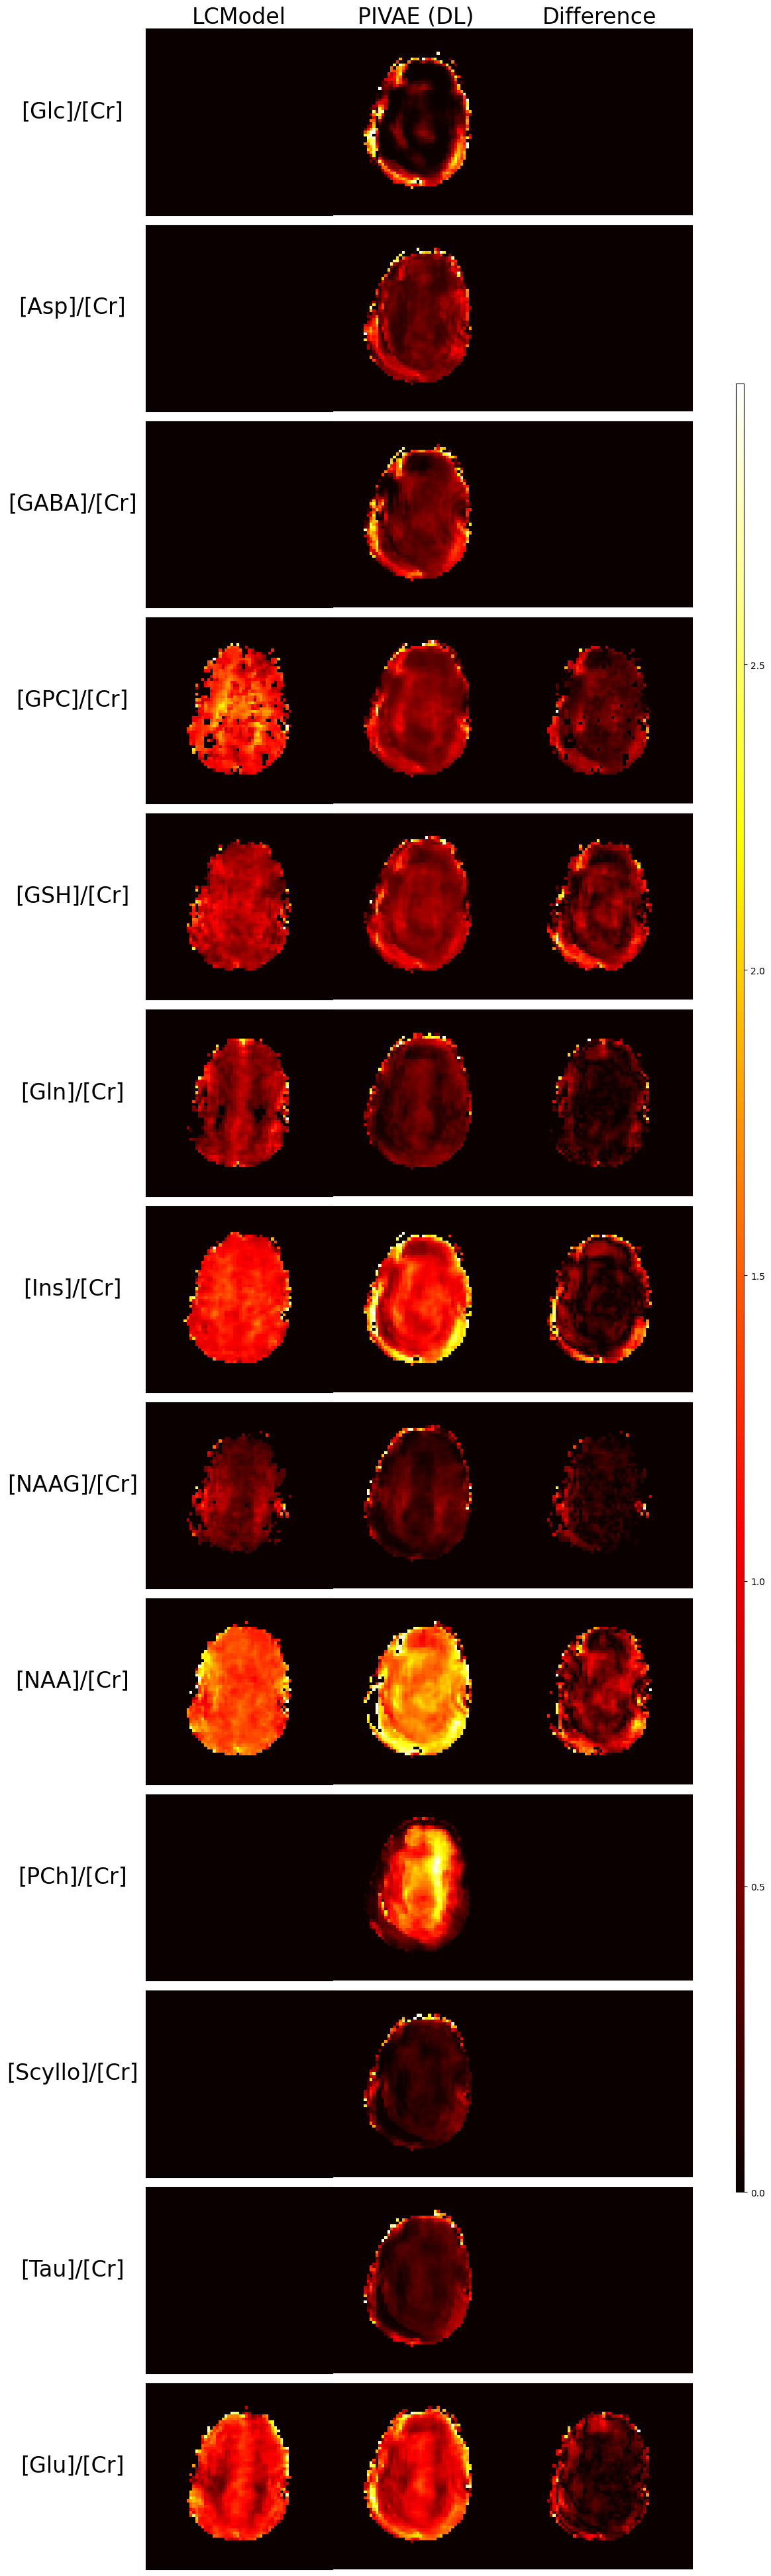

1.9984837757033256


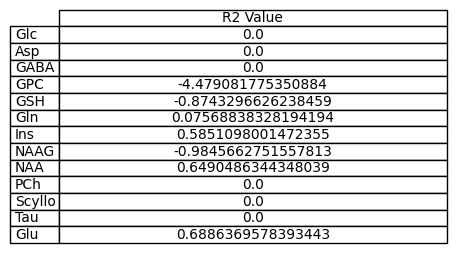

IndexError: index 12 is out of bounds for axis 0 with size 12

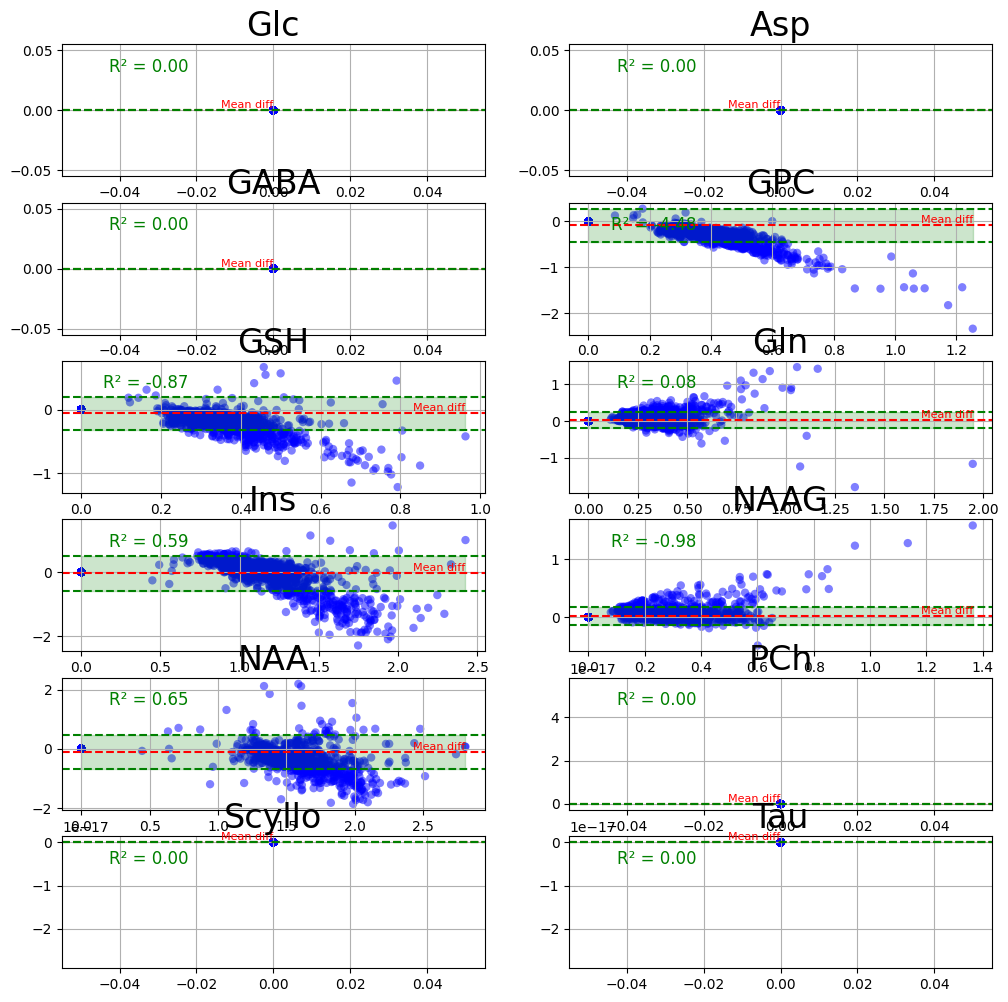

In [6]:
def analyze(nifti_data_1, nifti_data_2, name, trsh=3):

    # Process the data
    # trsh = 2
    nifti_data_1[nifti_data_1 > trsh] = 0
    nifti_data_2[nifti_data_2 > trsh] = 0
    slice_index = 16
    slice_1 = nifti_data_1[:, :, slice_index]
    slice_2 = nifti_data_2[:, :, slice_index]
    mask = ~((slice_1 == 0) | (slice_2 == 0))
    # mask_t = ~((nifti_data_1 == 0) | (nifti_data_2 == 0))
    # Calculate SSIM and R-squared values
    ssim_value = 0#ssim(nifti_data_1, nifti_data_2, data_range=nifti_data_1.max() - nifti_data_1.min())
    r2_value = r2_score(nifti_data_1.reshape(-1), nifti_data_2.reshape(-1))


    # Return the slices, mask, and the calculated values
    return (slice_1, slice_2, mask, ssim_value, r2_value)

# We will use this function to plot all images and Bland-Altman plots
def plot_all(names, results):
    num_metabolites = len(names)
    fig, axes = plt.subplots(num_metabolites, 3, figsize=(12, num_metabolites * 3))
    axes[0, 0].set_title('LCModel', fontsize=24)
    axes[0, 1].set_title('PIVAE (DL) ', fontsize=24)
    axes[0, 2].set_title('Difference', fontsize=24)
    for i, (slice_1, slice_2, mask, _, _ ) in enumerate(results):
        # Plot the first slice
        im_1 = axes[i, 0].imshow(slice_1.T, cmap="hot", origin="lower")
        axes[i, 1].axis('off')  # Removes the border
        # axes[i, 0].set_title(f'LCModel [{names[i]}]')
        # cbar = fig.colorbar(im_1, ax=axes[i,0], orientation='horizontal')
        axes[i,0].set_xticks([])  # Turn off x-axis ticks
        axes[i,0].set_yticks([])  # Turn off y-axis ticks
        # Plot the second slice
        im_2 = axes[i, 1].imshow(slice_2.T, cmap="hot", origin="lower")
        # axes[i, 1].set_title(f'Deep Learning [{names[i]}]')
        # cbar = fig.colorbar(im_2, ax=axes[i,1], orientation='horizontal')
        axes[i, 1].axis('off')  # Removes the border
        axes[i,1].set_xticks([])  # Turn off x-axis ticks
        axes[i,1].set_yticks([])  # Turn off y-axis ticks
        # Plot the difference
        im_diff = axes[i, 2].imshow((np.abs(slice_1 - slice_2) * mask).T, cmap="hot", origin="lower")
        # axes[i, 2].set_title('Diff of Slices')
        axes[i, 2].axis('off')  # Removes the border
        # cbar = fig.colorbar(im_diff, ax=axes[i,2], orientation='horizontal')
        axes[i,2].set_xticks([])  # Turn off x-axis ticks
        axes[i,2].set_yticks([])  # Turn off y-axis ticks
        # Create an axis for color bars on the right side
        axes[i, 0].set_ylabel(f'[{names[i]}]/[Cr]', fontsize=24, rotation=0, labelpad=80)
    cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
    
    # Use the same color scale for all images by finding the global min and max
    global_min = min([np.min(result[0]) for result in results])
    global_max = max([np.max(result[0]) for result in results])
    
    # Normalize the color bar
    norm = plt.Normalize(vmin=global_min, vmax=global_max)
    
    # Add color bar for all images
    fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap="hot"), cax=cbar_ax)
    plt.tight_layout(rect=[0, 0, 0.9, 1])
    plt.show()
    
    r2_values = [result[4] for result in results]
    # r2 = 0
    # r2_sum = [r2+x for x in r2_values if x>0]
    print(sum(x for x in r2_values if x > 0))
    # Creating a table of R2 values using matplotlib table functionality
    fig, ax = plt.subplots(figsize=(5, 1))  # Set the figure size
    ax.axis('tight')
    ax.axis('off')  # Hide the axes
    the_table = ax.table(cellText=np.array([r2_values]).T, rowLabels=names, colLabels=['R2 Value'],
                         loc='center', cellLoc='center')
    
    plt.show()
    
    
    fig, axes = plt.subplots(num_metabolites//2, 2 , figsize=(12, 12))

    for i, (slice_1, slice_2, mask, _, r2_value) in enumerate(results):
        # Plot the first slice
        bland_altman_plot((slice_1*mask).flatten(), (slice_2*mask).flatten(), axes.flatten()[i],names[i])
        axes.flatten()[i].text(0.3, 0.9, f'R² = {r2_value:.2f}',
        verticalalignment='top', horizontalalignment='right',
        transform=axes.flatten()[i].transAxes,
        color='green', fontsize=12)
    plt.tight_layout()
    plt.show()

path = "C:/Work/nmrlab10/MRSI_fit/"
# Replace 'path_to_nifti_file_1' and 'path_to_nifti_file_2' with your actual file paths
names = ["Glc","Asp", "GABA","GPC","GSH","Gln","Ins","NAAG","NAA","PCh","Scyllo","Tau","Glu"]

for subj in [8]:
    results = []
    for name in names:
        nifti_file_1_path = f'experiments/ISMRM_2/1/Nifty_versions/HC0{subj}_M01_ratios_nii/{name}_RatToCr+PCr_map_new.nii'
        nifti_file_2_path = f'experiments/exp50/1/test/HC0{subj}_M01/{name}.nii.gz'
        nifti_img_1 = load_nifti_file(path+nifti_file_1_path)
        nifti_img_2 = load_nifti_file(path+nifti_file_2_path)
        nifti_data_1 = np.nan_to_num(nifti_img_1.get_fdata())
        nifti_data_2 = np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()),axis=(0,1))
        nifti_data_1 = np.nan_to_num(nifti_data_1)
        results.append(analyze(nifti_data_1,nifti_data_2, name))  
# results = [analyze(path+nifti_file_1_path,path+nifti_file_2_path, name) for name in names]

# Now, we will plot all the images in one figure and all the Bland-Altman plots in another figure.
    plot_all(names, results)

In [ ]:
path = "C:/Work/nmrlab10/MRSI_fit/"
# Replace 'path_to_nifti_file_1' and 'path_to_nifti_file_2' with your actual file paths
names = [["NAA", "NAAG"],["Glu", "Gln"],["GPC", "PCh"],["Ins"]]



print(names)
for subj in [8]:
    results = []
    nifti_file_2_path_ref_1 =  path+f'experiments/exp52/1/test/HC0{subj}_M01/Cr.nii.gz'
    nifti_file_2_path_ref_2 =  path+f'experiments/exp52/1/test/HC0{subj}_M01/PCr.nii.gz'
    nifti_data_2_ref = np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_1).get_fdata()) + np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_2).get_fdata())
    for gp_name in names:
        nifti_data_1_=0
        nifti_data_2_=0
        for name in gp_name:
            print(name)
            nifti_file_1_path = f'experiments/ISMRM_2/1/Nifty_versions/HC0{subj}_M01_ratios_nii/{name}_RatToCr+PCr_map_new.nii'
            nifti_file_2_path = f'experiments/exp52/1/test/HC0{subj}_M01/{name}.nii.gz'
            nifti_img_1 = load_nifti_file(path+nifti_file_1_path)
            nifti_img_2 = load_nifti_file(path+nifti_file_2_path)
            nifti_data_1 = np.nan_to_num(nifti_img_1.get_fdata())
            nifti_data_2_ += np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
            nifti_data_1_ += np.nan_to_num(nifti_data_1)

            
        results.append(analyze(nifti_data_1_,nifti_data_2_, name, trsh=3))  
# results = [analyze(path+nifti_file_1_path,path+nifti_file_2_path, name) for name in names]

# Now, we will plot all the images in one figure and all the Bland-Altman plots in another figure.
    plot_all(["tNAA","Glx","tCho","Ins"], results)
    


C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\2710128539.py:21: RuntimeWarning: invalid value encountered in divide
  nifti_data_2 = np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\2710128539.py:22: RuntimeWarning: divide by zero encountered in divide
  nifti_data_1 = np.nan_to_num(nifti_data_1/nifti_data_1_ref)
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\2710128539.py:22: RuntimeWarning: invalid value encountered in divide
  nifti_data_1 = np.nan_to_num(nifti_data_1/nifti_data_1_ref)
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\2710128539.py:21: RuntimeWarning: invalid value encountered in divide
  nifti_data_2 = np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\2710128539.py:22: RuntimeWarning: divide by zero encountered in divide
  nifti_data_1 = np.nan_to_num(nifti_data_1/nift

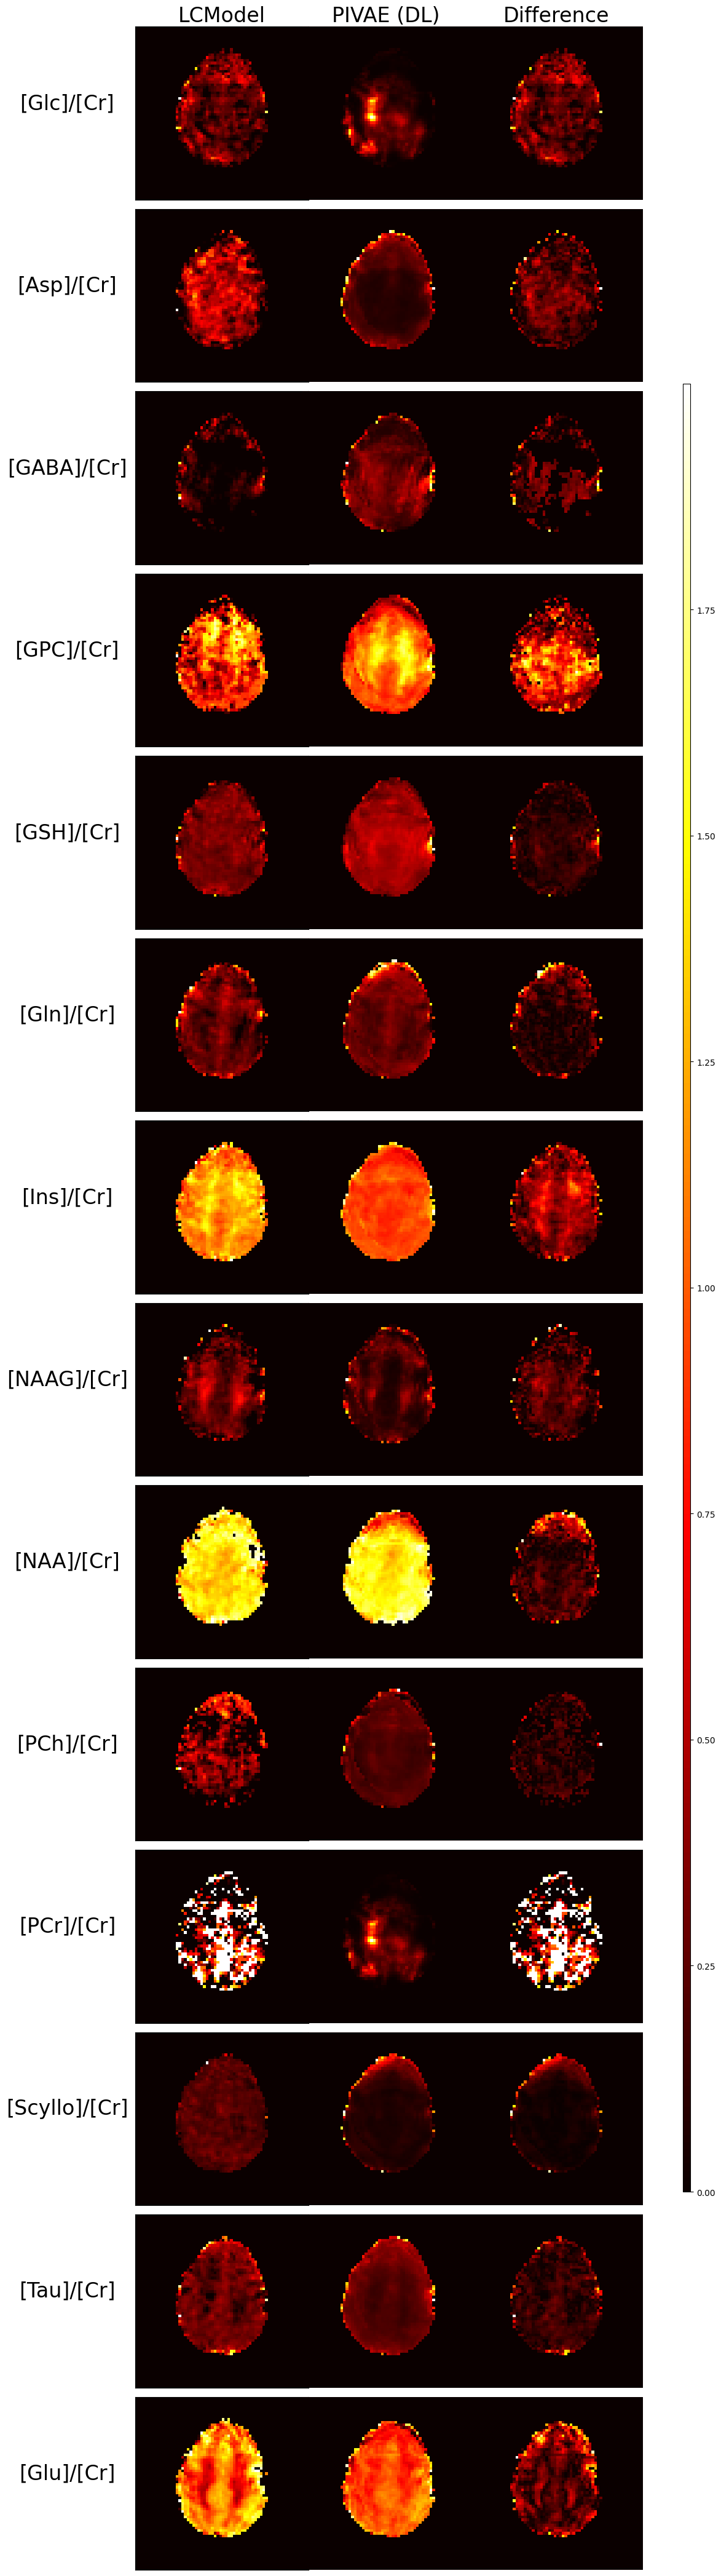

3.4410127644710524


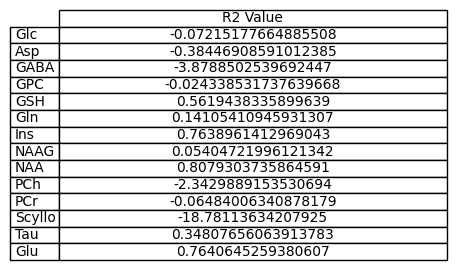

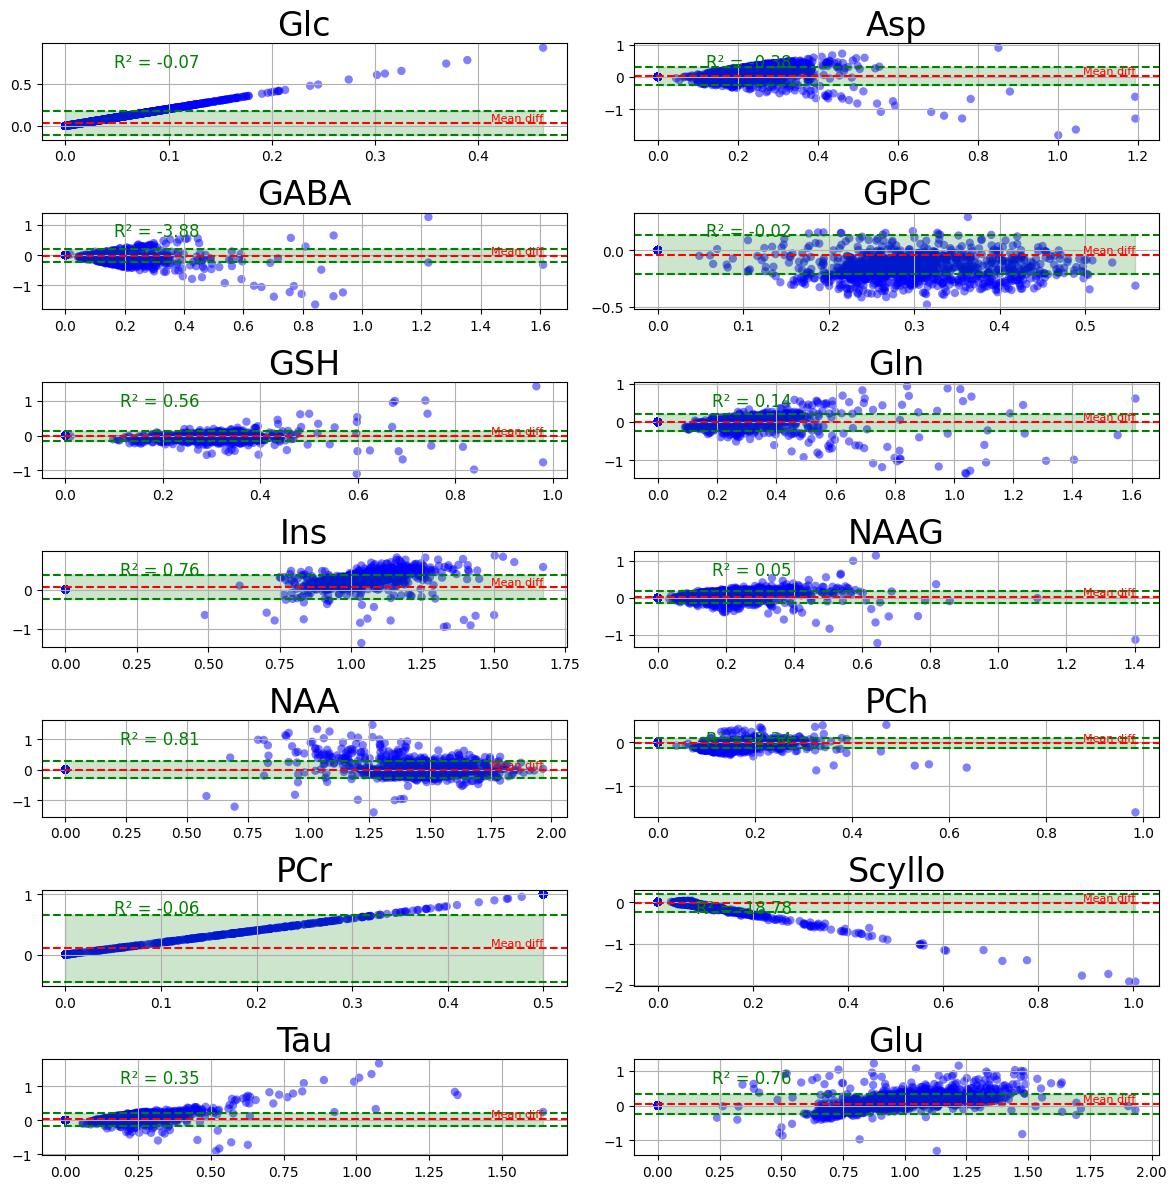

In [12]:
names = ["Glc","Asp", "GABA","GPC","GSH","Gln","Ins","NAAG","NAA","PCh","PCr","Scyllo","Tau","Glu"]

nifti_file_1_path_ref = 'C:\\Work\\nmrlab10\\MRSI_fit\\data\\new_data\\MS_Better_Patient\\maps\\Orig\\Cr+PCr_amp_map.nii'
nifti_data_1_ref = np.nan_to_num(load_nifti_file(nifti_file_1_path_ref).get_fdata())


nifti_file_2_path_ref_1 =  'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp51\\1\\test\\MS_Better_Patient\\Cr.nii.gz'
nifti_file_2_path_ref_2 =  'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp51\\1\\test\\MS_Better_Patient\\PCr.nii.gz'
nifti_data_2_ref = np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_1).get_fdata()) + np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_2).get_fdata())


for subj in [8]:
    results = []
    for name in names:
        nifti_file_1_path = f'C:\\Work\\nmrlab10\\MRSI_fit\\data\\new_data\\MS_Better_Patient\\maps\\Orig\\{name}_amp_map.nii'
        nifti_file_2_path = f'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp51\\1\\test\\MS_Better_Patient\\{name}.nii.gz'
        # Load the NIfTI files
        nifti_img_1 = load_nifti_file(nifti_file_1_path)
        nifti_img_2 = load_nifti_file(nifti_file_2_path)
        nifti_data_1 = np.nan_to_num(nifti_img_1.get_fdata())
        nifti_data_2 = np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
        nifti_data_1 = np.nan_to_num(nifti_data_1/nifti_data_1_ref)
        results.append(analyze(nifti_data_1,nifti_data_2, name, trsh=2))  
# results = [analyze(path+nifti_file_1_path,path+nifti_file_2_path, name) for name in names]

# Now, we will plot all the images in one figure and all the Bland-Altman plots in another figure.
    plot_all(names, results)

[['NAA', 'NAAG'], ['Glu', 'Gln'], ['GPC', 'PCh'], ['Ins']]


C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3648240970.py:25: RuntimeWarning: invalid value encountered in divide
  nifti_data_2_ += np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3648240970.py:26: RuntimeWarning: divide by zero encountered in divide
  nifti_data_1_ += np.nan_to_num(nifti_data_1/nifti_data_1_ref)
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3648240970.py:26: RuntimeWarning: invalid value encountered in divide
  nifti_data_1_ += np.nan_to_num(nifti_data_1/nifti_data_1_ref)
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3648240970.py:26: RuntimeWarning: overflow encountered in add
  nifti_data_1_ += np.nan_to_num(nifti_data_1/nifti_data_1_ref)
C:\Users\amsha\AppData\Local\Temp\ipykernel_32700\3648240970.py:25: RuntimeWarning: invalid value encountered in divide
  nifti_data_2_ += np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze(

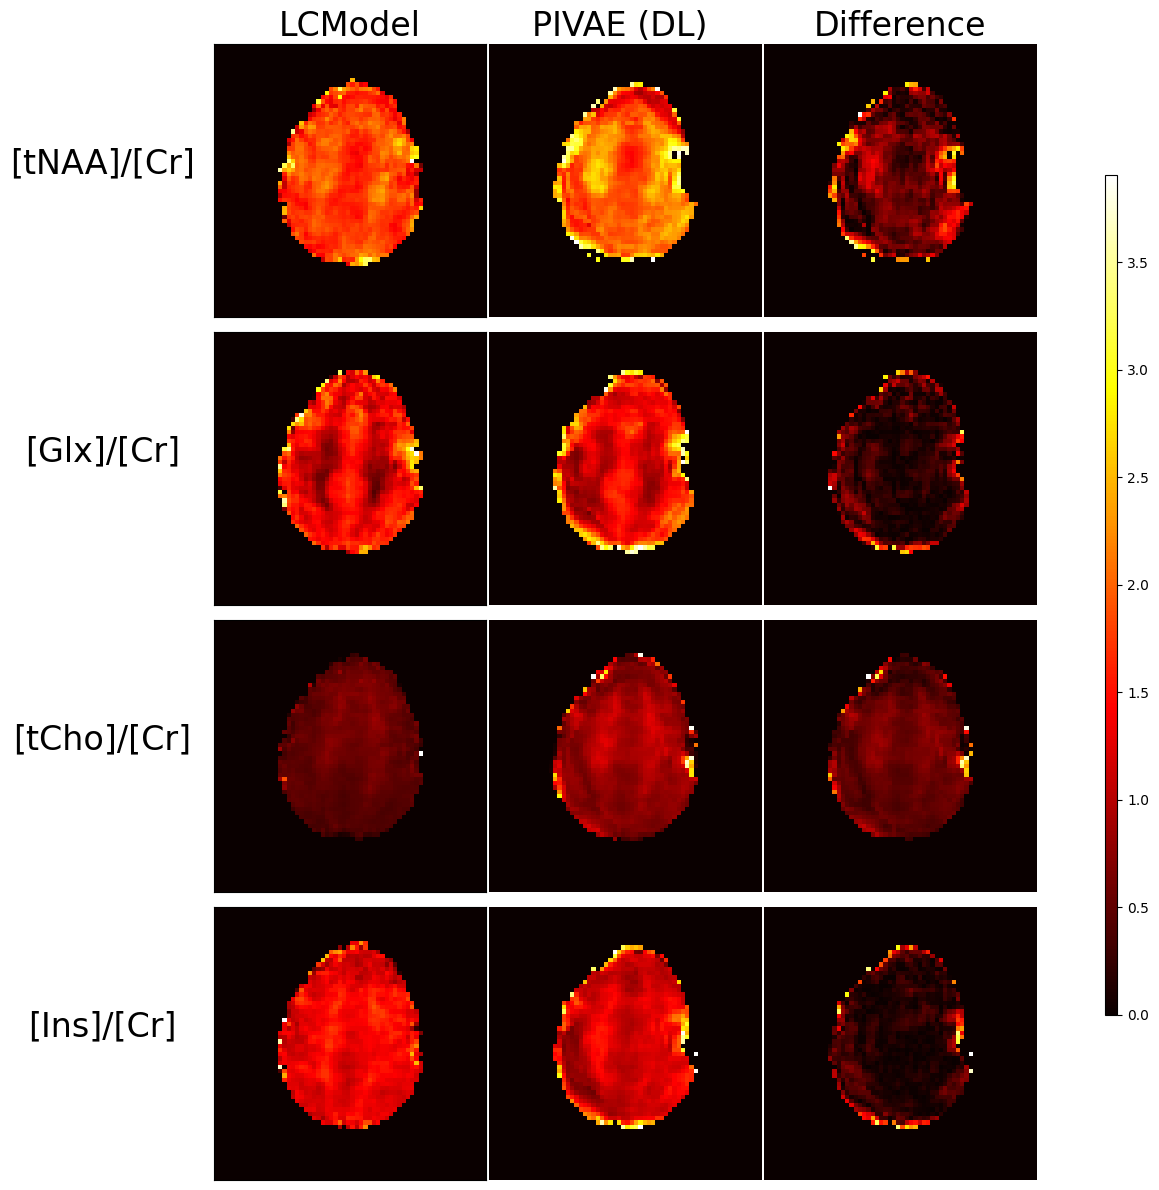

1.8189939982878651


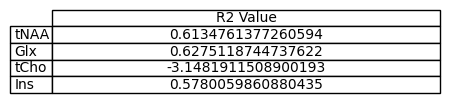

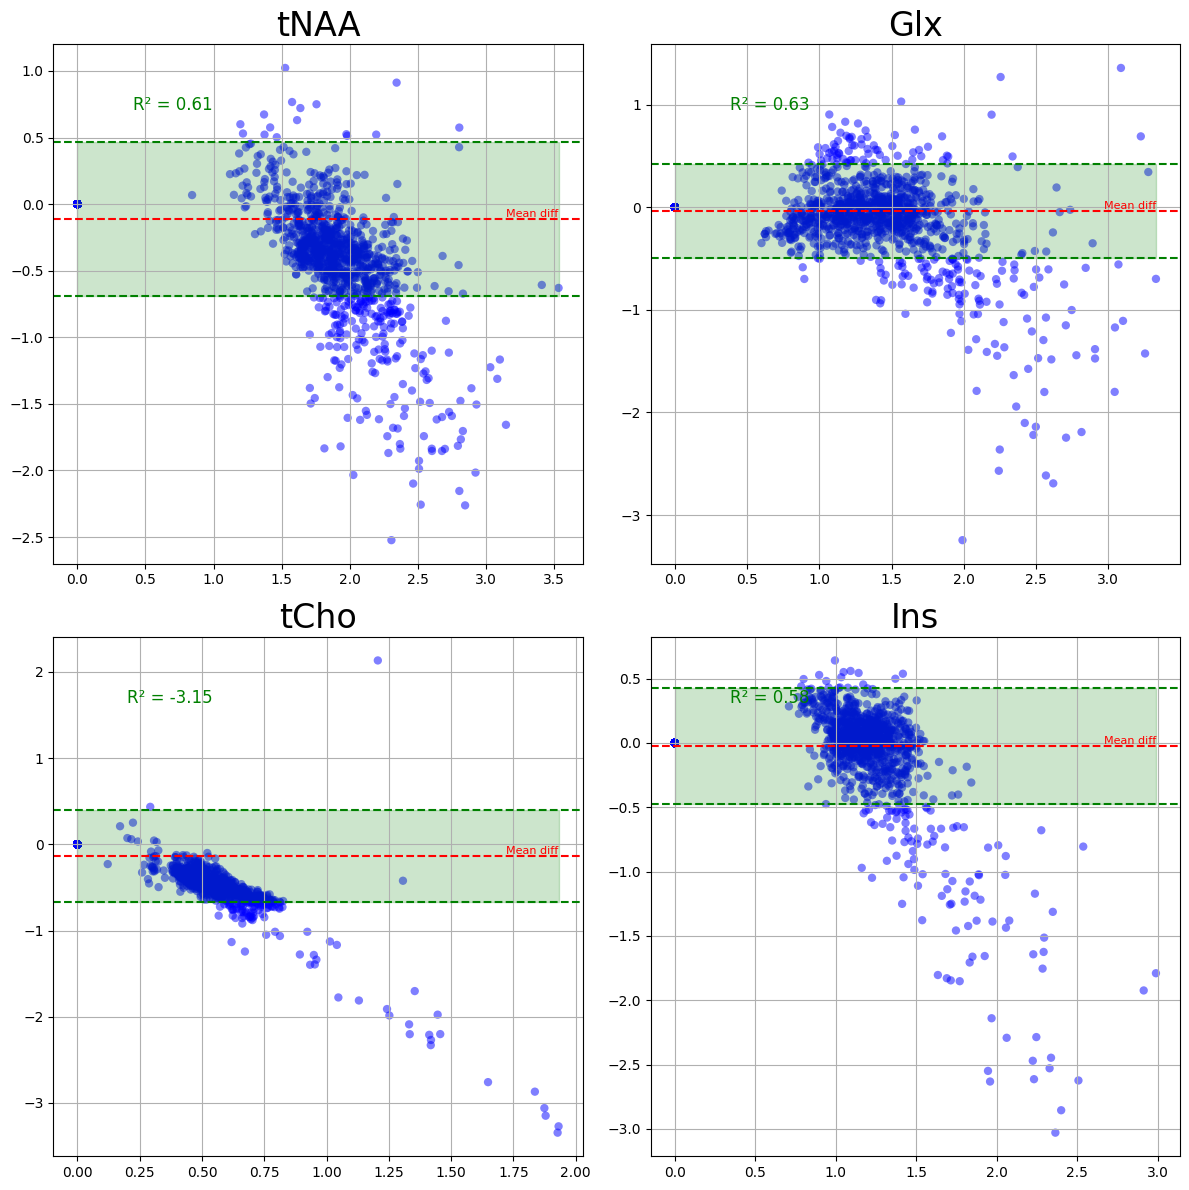

In [16]:
path = "C:/Work/nmrlab10/MRSI_fit/"

nifti_file_1_path_ref = 'C:\\Work\\nmrlab10\\MRSI_fit\\data\\new_data\\MS_Better_Patient\\maps\\Orig\\Cr+PCr_amp_map.nii'
nifti_data_1_ref = np.nan_to_num(load_nifti_file(nifti_file_1_path_ref).get_fdata())

nifti_file_2_path_ref_1 =  'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp52\\1\\test\\MS_Better_Patient\\Cr.nii.gz'
nifti_file_2_path_ref_2 =  'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp52\\1\\test\\MS_Better_Patient\\PCr.nii.gz'
nifti_data_2_ref = np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_1).get_fdata()) + np.nan_to_num(load_nifti_file(nifti_file_2_path_ref_2).get_fdata())

# Replace 'path_to_nifti_file_1' and 'path_to_nifti_file_2' with your actual file paths
names = [["NAA", "NAAG"],["Glu", "Gln"],["GPC", "PCh"],["Ins"]]
print(names)
for subj in [8]:
    results = []
    for gp_name in names:
        nifti_data_1_ = 0
        nifti_data_2_ = 0
        for name in gp_name:
            nifti_file_1_path = f'C:\\Work\\nmrlab10\\MRSI_fit\\data\\new_data\\MS_Better_Patient\\maps\\Orig\\{name}_amp_map.nii'
            nifti_file_2_path = f'C:\\Work\\nmrlab10\\MRSI_fit\\experiments\\exp52\\1\\test\\MS_Better_Patient\\{name}.nii.gz'
            # Load the NIfTI files
            nifti_img_1 = load_nifti_file(nifti_file_1_path)
            nifti_img_2 = load_nifti_file(nifti_file_2_path)
            nifti_data_1 = np.nan_to_num(nifti_img_1.get_fdata())
            nifti_data_2_ += np.flip(np.nan_to_num(nifti_img_2.get_fdata().squeeze()/nifti_data_2_ref.squeeze()),axis=(0,1))
            nifti_data_1_ += np.nan_to_num(nifti_data_1/nifti_data_1_ref)
            
        results.append(analyze(nifti_data_1_,nifti_data_2_, name,trsh=4))  
# results = [analyze(path+nifti_file_1_path,path+nifti_file_2_path, name) for name in names]

# Now, we will plot all the images in one figure and all the Bland-Altman plots in another figure.
    plot_all(["tNAA","Glx","tCho","Ins"], results)